# WT docs

In [20]:
import os, json
from src.load_index import setup_system
import pyterrier as pt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import yaml

sns.set_style('darkgrid')

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
with open("../settings.yml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)

# Summary Stats

In [3]:
WT = pd.read_csv("../data/doc_WT_stats.csv")
ST = pd.read_csv("../data/doc_ST_stats.csv")
LT = pd.read_csv("../data/doc_LT_stats.csv")

In [4]:
WT.describe().round(4)

,len stream,len token,len stop,len stop unique,len stem,len stem unique
count,1570734.00,1570734.00,1570734.00,1570734.00,1570734.00,1570734.00
mean,4846.15,794.11,559.47,370.46,559.47,344.47
std,3228.08,532.73,386.06,239.44,386.06,222.99
min,3.00,0.00,0.00,0.00,0.00,0.00
25%,1998.00,327.00,230.00,171.00,230.00,162.00
50%,4224.00,693.00,480.00,328.00,480.00,305.00
75%,8169.00,1311.00,878.00,556.00,878.00,509.00
max,26645.00,7065.00,6981.00,1480.00,6981.00,1472.00


In [5]:
ST.describe().round(4)

,len stream,len token,len stop,len stop unique,len stem,len stem unique
count,1593376.00,1593376.00,1593376.00,1593376.00,1593376.00,1593376.00
mean,4842.42,793.96,559.41,370.72,559.41,344.76
std,3229.62,532.99,386.27,239.42,386.27,222.97
min,3.00,0.00,0.00,0.00,0.00,0.00
25%,1997.00,327.00,230.00,171.00,230.00,162.00
50%,4217.00,692.00,479.00,328.00,479.00,305.00
75%,8158.00,1309.00,877.00,556.00,877.00,508.00
max,99655.00,12210.00,12201.00,1809.00,12201.00,1730.00


In [6]:
LT.describe().round(4)

,len stream,len token,len stop,len stop unique,len stem,len stem unique
count,1081334.00,1081334.00,1081334.00,1081334.00,1081334.00,1081334.00
mean,4902.05,807.28,565.14,368.98,565.14,342.34
std,3245.20,540.59,388.39,234.54,388.39,217.24
min,3.00,1.00,1.00,1.00,1.00,1.00
25%,2003.00,327.00,230.00,171.00,230.00,161.00
50%,4291.00,704.00,488.00,330.00,488.00,306.00
75%,8324.00,1330.00,889.00,556.00,889.00,508.00
max,47243.00,7255.00,6981.00,1472.00,6981.00,1472.00


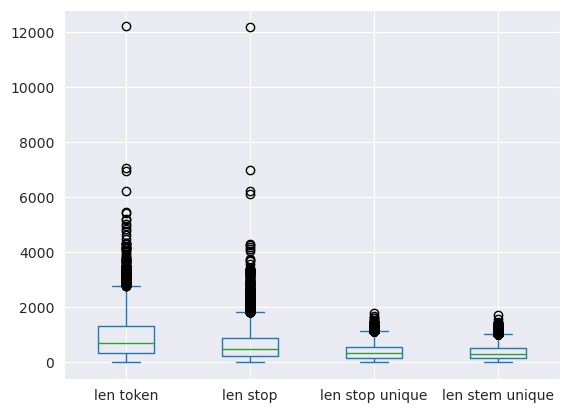

In [7]:
ax = ST[["len token", "len stop", "len stop unique", "len stem unique"]].plot.box()

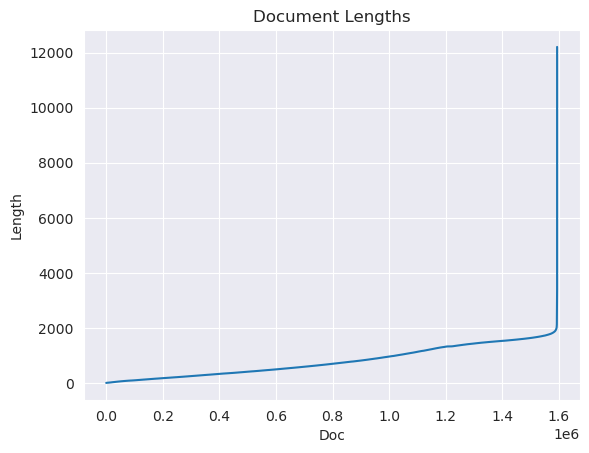

In [8]:
ax = ST.sort_values("len token").reset_index()["len token"].plot(title="Document Lengths", xlabel="Doc", ylabel="Length")

In [9]:
df_merged = LT[["len token"]].sort_values("len token", ascending=False).reset_index()[["len token"]].merge(ST[["len token"]].sort_values("len token", ascending=False).reset_index()[["len token"]], how='outer', left_index=True, right_index=True)

In [10]:
ST_token = ST["len token"].sort_values(ascending=False).reset_index(drop=True)
LT_token = LT["len token"].sort_values(ascending=False).reset_index(drop=True)

# Overlap

In [12]:
WT_doc_ids = []
for name in os.listdir("../"+config["WT"]["docs"].replace("Trec", "Json")):
    with open("../"+config["WT"]["docs"].replace("Trec", "Json") + name, "r") as f:
        a = json.load(f)
        for doc in a:
            WT_doc_ids.append(doc["id"])

In [13]:
ST_doc_ids = []
for name in os.listdir("../"+config["ST"]["docs"].replace("Trec", "Json")):
    with open("../"+config["ST"]["docs"].replace("Trec", "Json") + name, "r") as f:
        a = json.load(f)
        for doc in a:
            ST_doc_ids.append(doc["id"])

In [14]:
LT_doc_ids = []
for name in os.listdir("../"+config["LT"]["docs"].replace("Trec", "Json")):
    with open("../"+config["LT"]["docs"].replace("Trec", "Json") + name, "r") as f:
        a = json.load(f)
        for doc in a:
            LT_doc_ids.append(doc["id"])

In [15]:
print("WT:", len(WT_doc_ids))
print("ST:", len(ST_doc_ids))
print("LT:", len(LT_doc_ids))

WT: 1570734
ST: 1593376
LT: 1081334


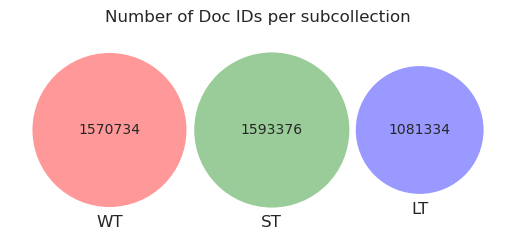

In [22]:
set1 = set(WT_doc_ids)
set2 = set(ST_doc_ids)
set3 = set(LT_doc_ids)

v = venn3([set1, set2, set3], ('WT', 'ST', 'LT'))

plt.title("Number of Doc IDs per subcollection")
plt.show()

### Unify by URL

In [25]:
# URLs
WT_urls = pd.read_csv("../data/publish/French/urls.txt", sep="\t", names=["docno", "url"])
ST_urls = pd.read_csv("../data/test-collection/A-Short-July/French/Documents/urls.txt", sep="\t", names=["docno", "url"])
LT_urls = pd.read_csv("../data/test-collection/B-Long-September/French/Documents/urls.txt", sep="\t", names=["docno", "url"])

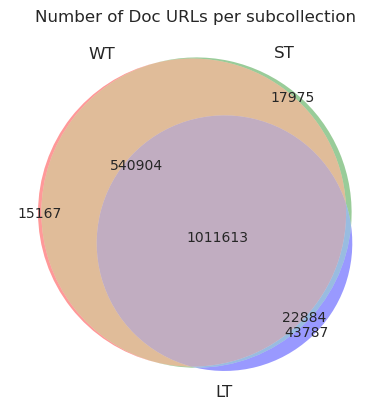

In [26]:
set1 = set(WT_urls["url"].to_list())
set2 = set(ST_urls["url"].to_list())
set3 = set(LT_urls["url"].to_list())

v = venn3([set1, set2, set3], ('WT', 'ST', 'LT'))

plt.title("Number of Doc URLs per subcollection")
plt.show()

# Core Docs

In [27]:
core_docs = WT_urls.merge(ST_urls, on="url", how="left", suffixes=("_WT", "_ST")).merge(LT_urls, on="url", how="left").rename(columns={"docno": "docno_LT"}).dropna()

In [28]:
core_docs[["docno_WT", "docno_ST", "docno_LT"]].to_csv("../data/core_docs.tsv", sep="\t", header=True)

# Term frequency of query terms in sub-collections

In [ ]:
stemmer = pt.TerrierStemmer.porter

def get_term_freq(subcollection: str):
    if subcollection == "WT":
        _, topics_train, _ = setup_system("WT", train=True)
        index, topics_test, _ = setup_system("WT", train=False)
        topics = pd.concat([topics_train, topics_test])
    else:
        index, topics ,_ = setup_system(subcollection, train=False)
    
    lex = index.getLexicon()

    def get_term_freq(term):
        stem = stemmer.stem(term)
        try:
            tf = lex[stem].getFrequency()
        except:
            tf = 0
            print(f"Term `{stem}` not found in index.")
        return tf

    queryies = topics["query"].to_list()
    query_terms = [query.split(" ") for query in queryies if query != ""]
    query_terms = [term for sublist in query_terms for term in sublist]
    df = pd.DataFrame({"term": query_terms})
    df.drop_duplicates(inplace=True)
    df["tf"] = df["term"].apply(get_term_freq)
    return df


In [ ]:
WT_tf = get_term_freq("WT")
ST_tf = get_term_freq("ST")
LT_tf = get_term_freq("LT")

Loaded index with  1570734 documents.
18:30:00.170 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - OutOfMemoryError: Structure meta reading data file directly from disk
Loaded index with  1570734 documents.
Term `v` not found in index.
Term `groundstak` not found in index.
Term `c` not found in index.
Term `lot` not found in index.
Term `re` not found in index.
18:30:01.188 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 3,4 GiB of memory would be required.
Loaded index with  1593376 documents.
Term `f` not found in index.
Term `s` not found in index.
Term `n` not found in index.
Term `lot` not found in index.
Term `4kvideo` not found in index.
18:30:01.945 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index prope

In [ ]:
tfs = WT_tf.merge(ST_tf, on="term", how="outer", suffixes=("_WT", "_ST")).merge(LT_tf, on="term", how="outer").rename(columns={"tf": "tf_LT"})

In [ ]:
tfs.dropna(inplace=True)
tfs.set_index("term", inplace=True)

In [ ]:
tfs.head()

,tf_WT,tf_ST,tf_LT
term,,,
car,499923.00,510142.00,377624.00
shelter,39721.00,40020.00,28547.00
airport,117428.00,119037.00,79495.00
antivirus,18158.00,19033.00,11995.00
free,1058482.00,1072201.00,785619.00


# Absolute changes

In [ ]:
doc_len = {}

for subcollection in ["WT", "ST", "LT"]:
    def get_doclen(docno):
        idx = id_no.get(docno)
        if idx == None:
            return 0
        else:
            doclen = doi.getDocumentEntry(idx).documentLength
            return doclen
    
    urls = pd.read_csv("../"+ config[subcollection]["urls"], sep="\t", names=["docno", "url"])
    
    index,_ ,_ = setup_system(subcollection, False)

    lex = index.getLexicon()
    doi = index.getDocumentIndex()
    meta = index.getMetaIndex()
    di = index.getDirectIndex()

    id_no = {}
    while True:
        try:
            id_no[meta.getItem("docno", len(id_no))] =  len(id_no)
        except:
            print("Ids loaded")
            break
        
    urls["len"] = urls["docno"].apply(get_doclen)
    doc_len[subcollection] = urls


Loaded index with  1570734 documents.
Ids loaded
11:56:40.069 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 3,4 GiB of memory would be required.
Loaded index with  1593376 documents.
Ids loaded
11:58:13.190 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 2,3 GiB of memory would be required.
Loaded index with  1081334 documents.
Ids loaded


In [ ]:
merge = doc_len["WT"].set_index("url").merge(
    doc_len["ST"].set_index("url"), left_index=True, right_index=True , how="outer", suffixes=("_WT", "_ST")).merge(doc_len["LT"].set_index("url"),left_index=True, right_index=True , how="outer").rename(columns={"len": "len_LT", "docno": "docno_LT"})

In [ ]:
merge["WT-ST"] = merge["len_WT"] - merge["len_ST"]
merge["ST-LT"] = merge["len_ST"] - merge["len_LT"]
merge["WT-LT"] = merge["len_WT"] - merge["len_LT"]

In [ ]:
merge.head()

,docno_WT,len_WT,docno_ST,len_ST,docno,len_LT,WT-ST,ST-LT,WT-LT
url,,,,,,,,,
http://0-studio-pour-2-personnes-234-aix-les-bains.hotel-in-lyon.com/fr/,doc062205503410,674.00,doc072206603956,697.00,NaN,NaN,-23.00,NaN,NaN
http://0-under-my-skin-0.cowblog.fr/meta/jeune/1.html,doc062215100327,250.00,doc072215002028,250.00,doc092203108885,250.00,0.00,0.00,0.00
http://0.aepiot.com/?q=cameras,NaN,NaN,NaN,NaN,doc092206008335,1213.00,NaN,NaN,NaN
http://000060j.webpreview.dsl.net/excellence%20award.htm,doc062208107938,239.00,doc072208401915,239.00,doc092202310806,239.00,0.00,0.00,0.00
http://0051b07.netsolhost.com/index.php/more-info/sdsu/25-films/1048-entertaining-movies-about-disabilities,doc062215206894,607.00,doc072211202801,607.00,doc092205301935,607.00,0.00,0.00,0.00


In [ ]:
print("WT to ST")
print("Changed:", len(merge[merge["WT-ST"]!=0]["WT-ST"].dropna()))
print("Stays the same:", len(merge[merge["WT-ST"]==0]["WT-ST"].dropna()))
print("Longer:", len(merge[merge["WT-ST"]>0]))
print("Shorter:", len(merge[merge["WT-ST"]<0]))
print("Added:", len(merge[merge["len_WT"].isna() & merge["len_ST"].notna()]))
print("Removed:", len(merge[merge["len_WT"].notna() & merge["len_ST"].isna()]))



WT to ST
Changed: 196682
Stays the same: 1355835
Longer: 94771
Shorter: 101911
Added: 40859
Removed: 18217


In [ ]:
print("ST to LT")
print("Changed:", len(merge[merge["ST-LT"]!=0]["ST-LT"].dropna()))
print("Stays the same:", len(merge[merge["ST-LT"]==0]["ST-LT"].dropna()))
print("Longer:", len(merge[merge["ST-LT"]>0]))
print("Shorter:", len(merge[merge["ST-LT"]<0]))
print("Added:", len(merge[merge["len_ST"].isna() & merge["len_LT"].notna()]))
print("Removed:", len(merge[merge["len_ST"].notna() & merge["len_LT"].isna()]))


ST to LT
Changed: 192624
Stays the same: 841873
Longer: 95713
Shorter: 96911
Added: 46837
Removed: 558879


In [ ]:
len(merge[merge["WT-ST"]<0])

101911

In [ ]:
len(merge[merge["WT-ST"]!=0]["WT-ST"].dropna())

196682

In [ ]:
merge["docno_WT"].dropna().count()

1570734

In [ ]:
merge["docno_ST"].dropna().count()#-40859

1593376

In [ ]:
merge["docno"].dropna().count()-46837

1034497